
# **GOOGLE Stock Price Prediction**

## Linear Regression Model

**IMPORTING LIBRARIES**

In [6]:
#Importing the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
# For preprocessing of data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# For building the Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# For Model Evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

**COLLECTING AND LOADING DATA**

In [7]:
# Importing the csv file
df = pd.read_csv('GOOGL.csv')

**UNDERSTANDING DATA**

In [8]:
# Viewing the file headers to derive a primary meaning of the data
df.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2007-10-17,315.54,317.32,311.11,317.06,12048900,13.498014,323.694527,269.702473,308.31,...,47.102,46.2860,44.1214,1541.24,1538.53,1562.47,13892.54,13912.94,14078.69,320.13
1,2007-10-18,318.02,321.01,314.56,320.13,24553800,13.603549,326.077599,271.663401,317.06,...,47.280,46.4535,44.2096,1540.08,1541.24,1554.41,13888.96,13892.54,14015.12,322.68
2,2007-10-19,327.61,329.57,321.94,322.68,31546400,13.859332,328.706664,273.269336,320.13,...,47.246,46.5460,44.2940,1500.63,1540.08,1561.80,13522.02,13888.96,14093.08,325.70
3,2007-10-22,319.65,327.83,318.46,325.70,13315400,14.319036,331.696571,274.420429,322.68,...,47.239,46.6560,44.3972,1506.33,1500.63,1548.71,13566.97,13522.02,13984.80,338.22
4,2007-10-23,330.96,339.14,330.33,338.22,13573800,15.652638,337.035777,274.425223,325.70,...,47.310,46.7945,44.5146,1519.59,1506.33,1538.53,13676.23,13566.97,13912.94,338.25


**EXPLORATORY DATA ANALYSIS**

In [9]:
df.shape

(3229, 64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3229 non-null   object 
 1   Open              3229 non-null   float64
 2   High              3229 non-null   float64
 3   Low               3229 non-null   float64
 4   Close(t)          3229 non-null   float64
 5   Volume            3229 non-null   int64  
 6   SD20              3229 non-null   float64
 7   Upper_Band        3229 non-null   float64
 8   Lower_Band        3229 non-null   float64
 9   S_Close(t-1)      3229 non-null   float64
 10  S_Close(t-2)      3229 non-null   float64
 11  S_Close(t-3)      3229 non-null   float64
 12  S_Close(t-5)      3229 non-null   float64
 13  S_Open(t-1)       3229 non-null   float64
 14  MA5               3229 non-null   float64
 15  MA10              3229 non-null   float64
 16  MA20              3229 non-null   float64


In [11]:
df.rename(columns={'Close(t)':'Close'}, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2007-10-17,315.54,317.32,311.11,317.06,12048900,13.498014,323.694527,269.702473,308.31,...,47.102,46.2860,44.1214,1541.24,1538.53,1562.47,13892.54,13912.94,14078.69,320.13
1,2007-10-18,318.02,321.01,314.56,320.13,24553800,13.603549,326.077599,271.663401,317.06,...,47.280,46.4535,44.2096,1540.08,1541.24,1554.41,13888.96,13892.54,14015.12,322.68
2,2007-10-19,327.61,329.57,321.94,322.68,31546400,13.859332,328.706664,273.269336,320.13,...,47.246,46.5460,44.2940,1500.63,1540.08,1561.80,13522.02,13888.96,14093.08,325.70
3,2007-10-22,319.65,327.83,318.46,325.70,13315400,14.319036,331.696571,274.420429,322.68,...,47.239,46.6560,44.3972,1506.33,1500.63,1548.71,13566.97,13522.02,13984.80,338.22
4,2007-10-23,330.96,339.14,330.33,338.22,13573800,15.652638,337.035777,274.425223,325.70,...,47.310,46.7945,44.5146,1519.59,1506.33,1538.53,13676.23,13566.97,13912.94,338.25


Date column is of type 'object'. Therefore it is necessary to cast it into type Date

In [12]:
# changing date format - date time format, to_datetime func
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3229 non-null   datetime64[ns]
 1   Open              3229 non-null   float64       
 2   High              3229 non-null   float64       
 3   Low               3229 non-null   float64       
 4   Close             3229 non-null   float64       
 5   Volume            3229 non-null   int64         
 6   SD20              3229 non-null   float64       
 7   Upper_Band        3229 non-null   float64       
 8   Lower_Band        3229 non-null   float64       
 9   S_Close(t-1)      3229 non-null   float64       
 10  S_Close(t-2)      3229 non-null   float64       
 11  S_Close(t-3)      3229 non-null   float64       
 12  S_Close(t-5)      3229 non-null   float64       
 13  S_Open(t-1)       3229 non-null   float64       
 14  MA5               3229 n

In [14]:
df.describe()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,3229.000000,3229.000000,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,...,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000
mean,615.820059,621.492471,609.775621,615.836646,4.489683e+06,15.845429,643.996784,580.615068,615.462431,615.091768,...,95.649627,95.310540,94.320622,1869.748390,1869.180133,1866.950836,16754.672013,16750.341329,16733.395841,616.204429
std,373.529679,377.037479,370.134402,373.867807,4.244228e+06,13.565474,388.549262,353.775668,373.570491,373.279044,...,56.235950,55.841654,54.745911,672.900632,672.404990,670.449923,5754.239059,5751.112171,5738.891082,374.157810
min,131.390000,134.820000,123.770000,128.850000,5.206000e+05,2.385956,160.795478,120.186229,128.850000,128.850000,...,24.048000,24.828500,25.837200,676.530000,676.530000,676.530000,6547.050000,6547.050000,6547.050000,128.850000
25%,290.830000,293.400000,287.930000,290.580000,1.673800e+06,7.381170,307.811652,274.591811,290.580000,290.580000,...,48.441000,48.366500,48.165000,1300.670000,1300.670000,1300.670000,12151.260000,12151.260000,12151.260000,290.580000
50%,537.640000,541.950000,532.240000,537.760000,3.206700e+06,11.375394,558.422072,512.251998,537.550000,537.510000,...,82.214000,81.957500,82.553200,1852.560000,1852.210000,1848.380000,16222.170000,16221.140000,16198.410000,538.000000
75%,939.070000,944.080000,931.250000,938.080000,5.604100e+06,19.973213,957.583570,911.598582,937.820000,937.430000,...,134.861000,135.017000,131.383600,2402.320000,2400.670000,2398.420000,21006.940000,21005.710000,20981.330000,938.930000
max,1585.030000,1587.050000,1552.620000,1564.850000,4.652800e+07,129.197311,1612.148227,1477.404581,1564.850000,1564.850000,...,270.255000,265.454000,255.044600,3386.150000,3386.150000,3386.150000,29551.420000,29551.420000,29551.420000,1564.850000


In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

##**PLOT TIME SERIES CHART FOR GOOGLE**
###**Based on the Close Price of the Stock**

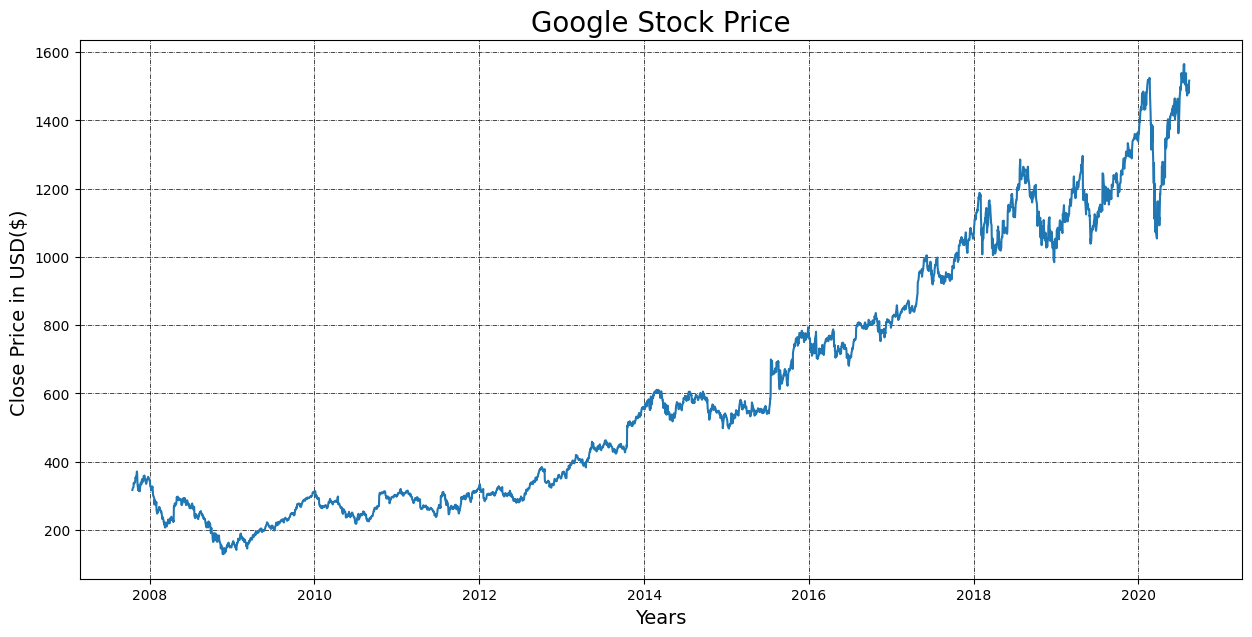

In [17]:
#Visualizing Close Price data
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='Date', y='Close')
plt.title("Google Stock Price", fontsize=20)
plt.ylabel('Close Price in USD($) ', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

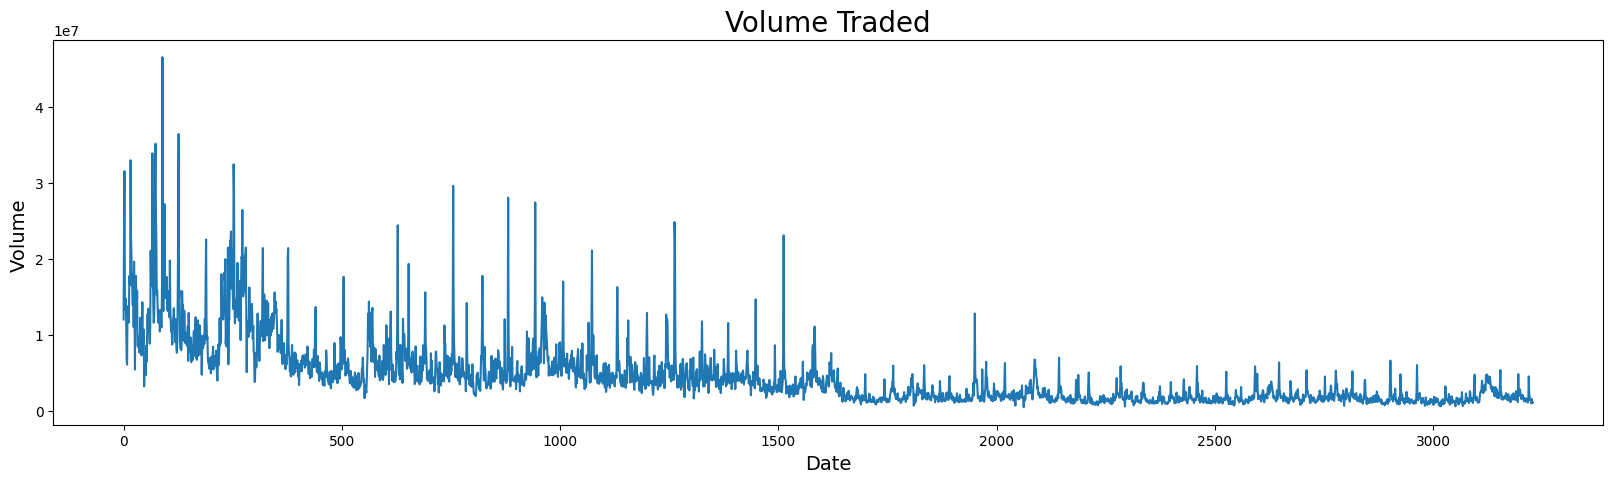

In [18]:
#Visualizing the Volume of trade data
df['Volume'].plot(figsize=(20, 5))
plt.title('Volume Traded', fontsize=20)
plt.ylabel('Volume ', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

## **PREPROCESSING THE DATA**

In [19]:
df.dtypes

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
                      ...      
SnP(t-5)                float64
DJIA_Close              float64
DJIA(t-1))              float64
DJIA(t-5)               float64
Close_forcast           float64
Length: 64, dtype: object

Since all the features of the dataset are numeric features, we only need to preprocess numeric features.

In [20]:
df.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 64, dtype: int64

This implies there are no null or missing values.

In [21]:
df.corr()['Close'].sort_values(ascending=False).head(10)

<ipython-input-21-68e71b9ad409>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Close'].sort_values(ascending=False).head(10)


Close            1.000000
Low              0.999851
High             0.999836
Open             0.999690
EMA10            0.999629
EMA200           0.999629
EMA100           0.999629
EMA50            0.999629
EMA20            0.999629
Close_forcast    0.999455
Name: Close, dtype: float64

#### **TRAIN TEST SPLIT**

Close_forecast is the column that we are trying to predict here which is the price for the next day

In [22]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)
X = np.array(df.index).reshape(-1,1)
# To create the NumPy array X from the index values of the dataframe df('Date')
# df.index refers to the index values of the DataFrame df, which in this case are the dates.
# np.array(df.index) converts the index values into a NumPy array.
# .reshape(-1,1) is used to reshape the array. In this case, -1 indicates that the number of rows is unknown and will be inferred based on the number of elements in the array, while 1 indicates that there should be only one column.
# By reshaping the array to have one column, we are preparing the data to be used as the independent variable (X) in the linear regression model. The X array will contain the dates, allowing us to train the model to predict the stock prices based on the corresponding dates
y = df['Close_forcast']

In [23]:
# Splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [24]:
X.shape

(3229, 1)

In [25]:
X_train.shape

(2260, 1)

In [26]:
y_train.shape

(2260,)

In [27]:
y_test.shape

(969,)

**Scaling the train set features**

In [28]:
mm = MinMaxScaler()
ss = StandardScaler()

#Feature Scaling -results in a feature set having normally distributed values
ss.fit(X_train)

StandardScaler()

**BUILDING LINEAR REGRESSION MODEL**

In [29]:
# Creating an instance of the LinearRegression class and training it
lr = LinearRegression()
lr.fit(X_train,y_train)
# y_pred = lr.predict(X_test)

LinearRegression()

**PREDICTION USING LINEAR REGRESSION**

In [30]:
type(X_test)

numpy.ndarray

In [31]:
# Predict the stock prices
X_test = X_test.astype(float)
y_pred = lr.predict(X_test)

In [32]:
y_test

Date
2019-08-16    1200.44
2009-11-12     286.31
2017-07-26     952.51
2013-07-19     455.81
2010-11-15     292.15
               ...   
2010-03-29     283.64
2018-08-23    1236.75
2015-01-22     541.95
2010-08-20     232.27
2008-04-16     224.99
Name: Close_forcast, Length: 969, dtype: float64

In [33]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,1130.664747
1,200.940369
2,934.754812
3,551.804367
4,296.938845
...,...
964,236.678932
965,1037.274924
966,695.802082
967,274.243553


In [34]:
y_test_df=pd.DataFrame(y_test)
y_test_df

,Close_forcast
Date,
2019-08-16,1200.44
2009-11-12,286.31
2017-07-26,952.51
2013-07-19,455.81
2010-11-15,292.15
...,...
2010-03-29,283.64
2018-08-23,1236.75
2015-01-22,541.95


In [35]:
# Create a new DataFrame for visualization
df_pred = pd.DataFrame({'Actual': y_test_df['Close_forcast'], 'Predicted': y_pred}, index=y_test.index)

In [36]:
df_pred = df_pred.reset_index()
df_pred

,Date,Actual,Predicted
0,2019-08-16,1200.44,1130.664747
1,2009-11-12,286.31,200.940369
2,2017-07-26,952.51,934.754812
3,2013-07-19,455.81,551.804367
4,2010-11-15,292.15,296.938845
...,...,...,...
964,2010-03-29,283.64,236.678932
965,2018-08-23,1236.75,1037.274924
966,2015-01-22,541.95,695.802082
967,2010-08-20,232.27,274.243553


In [37]:
df_pred.dtypes

Date         datetime64[ns]
Actual              float64
Predicted           float64
dtype: object

In [38]:
# Sorting the df_pred dataframe according to 'Date'
df_pred_sorted = df_pred.sort_values('Date')
df_pred_sorted

,Date,Actual,Predicted
102,2007-10-17,320.13,3.465241
675,2007-10-19,325.70,3.986972
444,2007-10-23,338.25,5.030434
83,2007-10-25,337.64,5.552165
293,2007-11-02,363.19,7.639088
...,...,...,...
636,2020-07-30,1487.95,1221.706780
565,2020-08-04,1479.09,1223.011107
522,2020-08-05,1504.95,1223.271973
103,2020-08-06,1498.37,1223.532838


**PLOT PREDICTED vs ACTUAL PRICE ON TIME SERIES PLOT FOR GOOGLE**

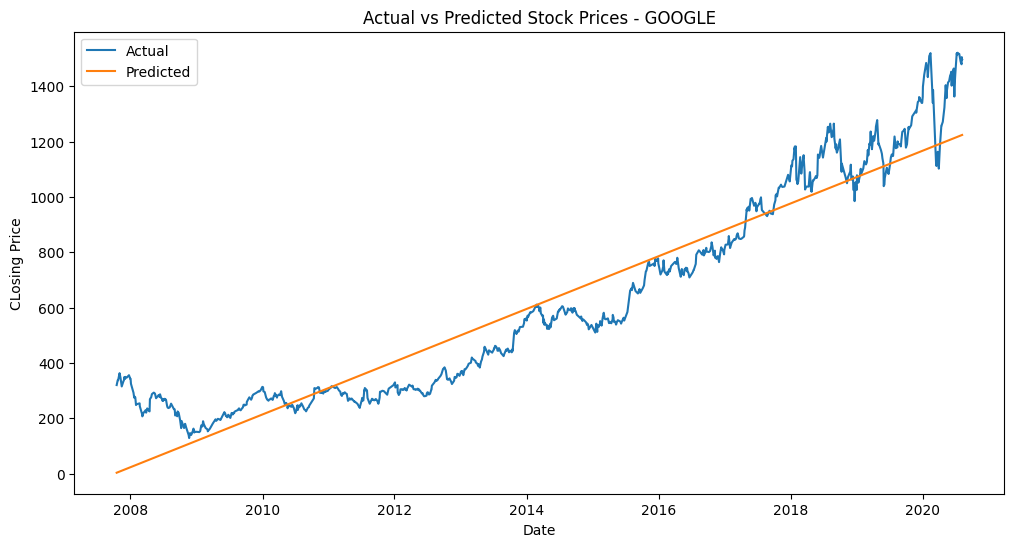

In [39]:
# Plot the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(df_pred_sorted['Date'], df_pred_sorted['Actual'], label='Actual')
plt.plot(df_pred_sorted['Date'], df_pred_sorted['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Stock Prices - GOOGLE')
plt.xlabel('Date')
plt.ylabel('CLosing Price')
plt.legend(['Actual', 'Predicted'])
plt.show()

**MODEL EVALUATION**

In [40]:
# Calculating theMAE and MSE for the Model
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
np.sqrt(mean_squared_error(y_test,y_pred))

98.31979910755095
14544.157822462035


120.5991617817555

DECICISION TREE REGRESSION

In [41]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
y_pred_tree = tree_reg.predict(X_test)

In [43]:
mean_squared_error(y_test, y_pred_tree)

163.7476420020639

In [44]:
#but this is overfitting model
#cv=8 => dividing into 8 folds
rmses = np.sqrt(-cross_val_score(tree_reg, X_train, y_train, cv=8, scoring='neg_mean_squared_error'))

In [45]:
#rmse of DecisionTreeRegressor
rmses

array([16.2147937 , 16.56069687, 11.63494696, 13.01799313, 11.06447462,
       11.70455664, 11.85903313, 15.88858083])

**RANDOM FOREST REGRESSOR**

In [46]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor()
rmses = np.sqrt(-cross_val_score(rand_reg, X_train, y_train, cv=8, scoring='neg_mean_squared_error'))

In [48]:
#rmse of RandomForestRegressor
rmses

array([15.19817768, 15.91154152, 10.06090556, 12.25064307, 10.08847015,
       10.63077718, 10.65481728, 14.73199294])

In [49]:
rand_reg.fit(X_train, y_train)
y_pred_rf = rand_reg.predict(X_test)
mean_squared_error(y_test, y_pred_rf)

116.2962404772029

The minimum value of Root Mean Squared Error is obtained by using the RandomForestRegressor model.